In [33]:
from collections import Counter

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from imblearn.datasets import make_imbalance
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
RANDOM_STATE = 42

# Create a folder to fetch the dataset
iris = load_iris()
X, y = make_imbalance(
    iris.data,
    iris.target,
    sampling_strategy={0: 25, 1: 50, 2: 50},
    random_state=RANDOM_STATE,
)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

In [4]:
print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({1: 38, 2: 38, 0: 17})
Testing target statistics: Counter({1: 12, 2: 12, 0: 8})


In [10]:
# Create a pipeline
pipeline = make_pipeline(
    NearMiss(version=2), StandardScaler(), LogisticRegression(random_state=RANDOM_STATE)
)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('nearmiss', NearMiss(version=2)),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=42))])

In [11]:
print(classification_report_imbalanced(y_test, pipeline.predict(X_test)))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00         8
          1       0.88      0.58      0.95      0.70      0.74      0.53        12
          2       0.69      0.92      0.75      0.79      0.83      0.70        12

avg / total       0.84      0.81      0.89      0.81      0.84      0.71        32



In [13]:
clf = LogisticRegression(random_state=RANDOM_STATE)
clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [15]:
print(classification_report_imbalanced(y_test, clf.predict(X_test)))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00         8
          1       0.92      0.92      0.95      0.92      0.93      0.87        12
          2       0.92      0.92      0.95      0.92      0.93      0.87        12

avg / total       0.94      0.94      0.96      0.94      0.95      0.90        32



In [22]:
def getConfusionMatrix(target, predicted):
    classes = sorted(list(set(target)))
    matrix = {}
    for c in classes:
        matrix[c] = {}
        for cc in classes:
            matrix[c][cc] = 0
    for i in range(len(target)):
        t = target[i]
        p = predicted[i]

        matrix[t][p] += 1
    
    return matrix

In [35]:
def plotMatrix(dct2D):
    # print(dct2D)
    arr2D = []
    for ik in dct2D:
        arr1D = []
        for jk in dct2D[ik]:
            arr1D.append(dct2D[ik][jk])
        arr2D.append(arr1D)
    df_cm = pd.DataFrame(arr2D, index = list(dct2D.keys()),
                  columns = list(dct2D.keys()))
    # plt.figure(figsize = (20,14))
    sn.heatmap(df_cm, annot=True)
    plt.show()

In [36]:
matrix = getConfusionMatrix(y_test, clf.predict(X_test))

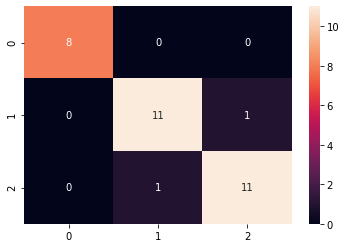

In [37]:
plotMatrix(matrix)